In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline

In [65]:
df = pd.read_csv("countries.csv").dropna()

In [66]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [67]:
corr = df.corr()

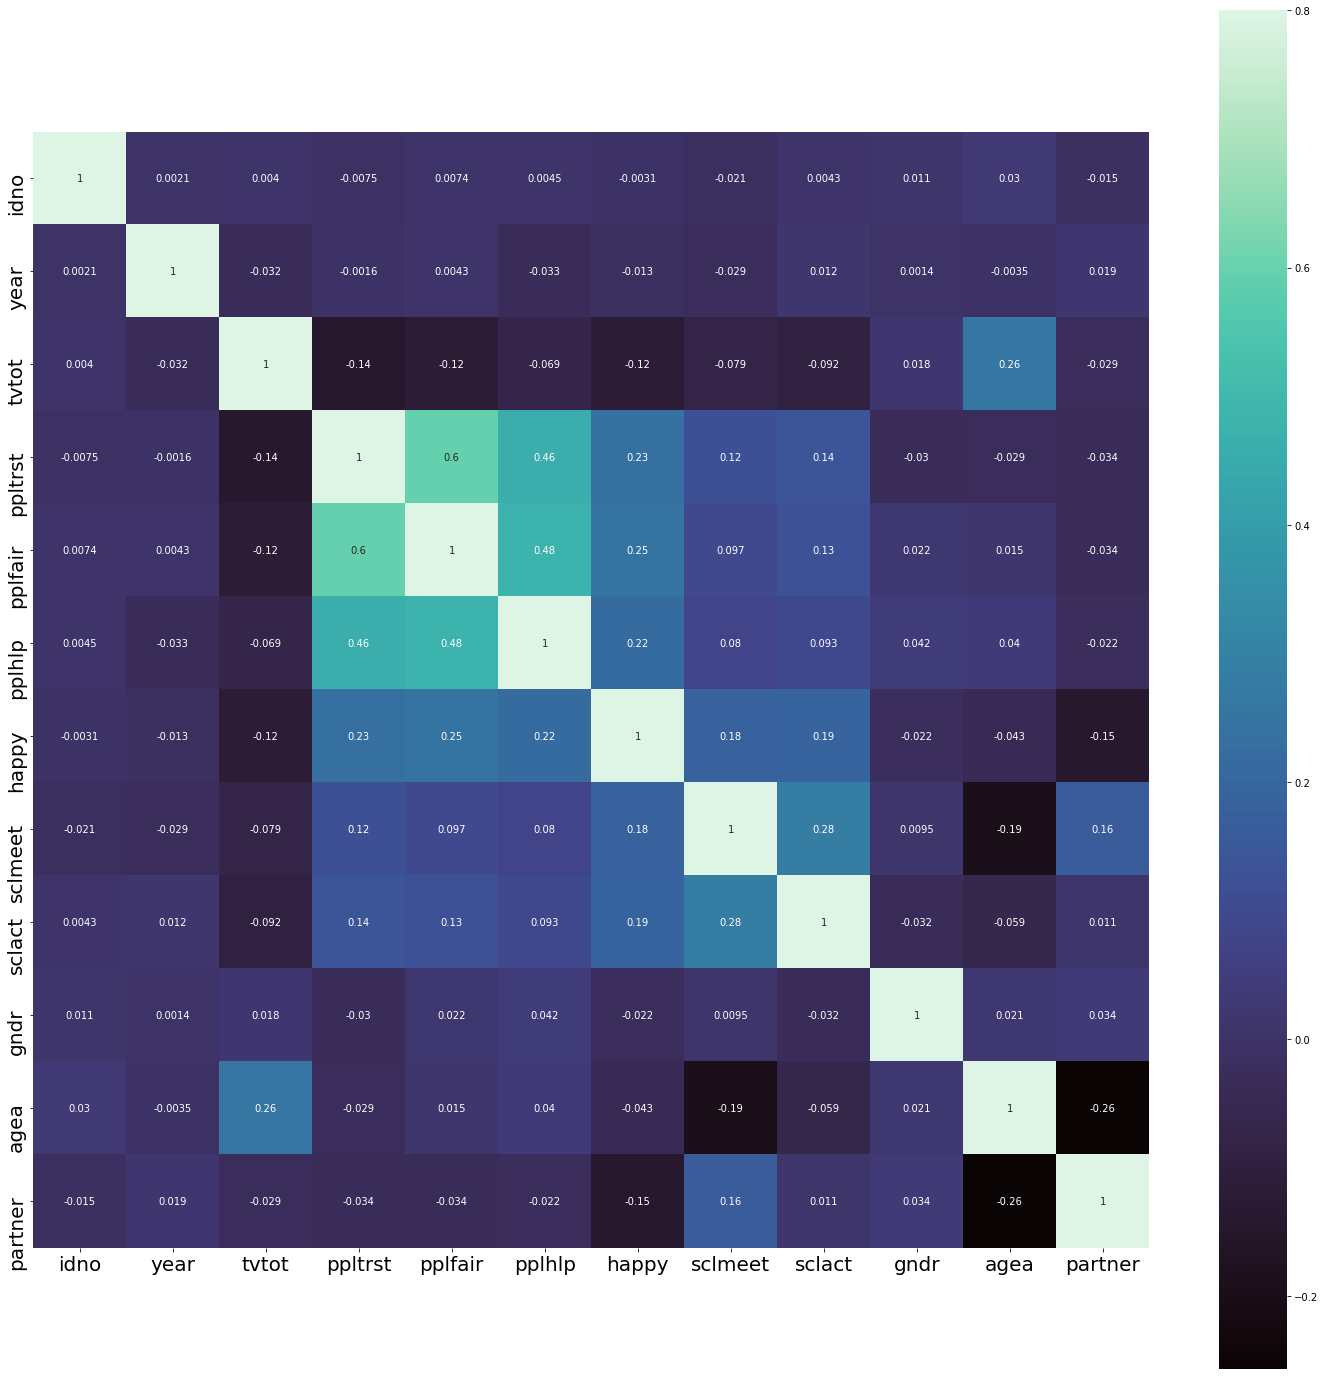

In [68]:
f, ax = plt.subplots(figsize=(25, 25))
plt.tick_params(axis="both", which="major", labelsize=20)
sns.heatmap(corr, annot=True, vmax=.8,square=True, cmap="mako")


In [69]:
features = pd.get_dummies(df['cntry'])

In [70]:
print(df[['ppltrst','pplfair','pplhlp']].mean())
print(df[['ppltrst','pplfair','pplhlp']].std())

ppltrst    5.574936
pplfair    6.005155
pplhlp     5.321468
dtype: float64
ppltrst    2.215745
pplfair    2.120127
pplhlp     2.166217
dtype: float64


In [71]:

means = df[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = df[['ppltrst','pplfair','pplhlp']].std(axis=0)
features['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)

In [72]:
plotdf = df.loc[:, ['ppltrst', 'pplfair', 'pplhlp']]
plotdf['trust_fair_help'] = features['trust_fair_help'] 

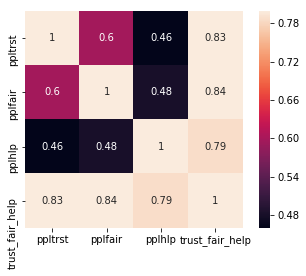

In [73]:
corr2 = plotdf.corr()
sns.heatmap(corr2, annot=True, vmax=.8, square=True)

In [108]:
print(((df[["tvtot", "happy"]] - means) / stds).mean(axis=1))

0      -0.119033
1       0.918186
2      -0.907365
3       0.710967
4       0.378743
6      -2.443481
7       0.213191
8      -0.077365
9      -0.160701
10     -0.326253
11     -0.160701
12      0.420411
13     -0.367921
14      0.129855
15      0.669298
16      0.129855
17     -0.949033
18     -0.575141
19     -0.367921
20      0.585962
21     -0.616809
22     -0.077365
23     -0.077365
24     -0.575141
25     -1.156252
26     -0.367921
27     -0.575141
28      0.213191
29      0.876518
30     -0.244037
          ...   
8564    0.213191
8565   -0.492925
8566   -0.367921
8567   -0.077365
8568   -0.326253
8569    0.918186
8570   -0.616809
8571   -0.119033
8572    0.378743
8573   -0.326253
8574   -0.907365
8575   -0.119033
8576   -0.160701
8577   -0.244037
8578   -0.907365
8579   -0.077365
8580    0.710967
8581   -0.616809
8582    0.627630
8583    0.213191
8584   -0.077365
8585   -0.326253
8586   -0.658477
8587    0.420411
8588   -0.035697
8589   -0.700145
8590    0.959854
8591    0.1298

In [120]:
#tv time + happy
means = df[["tvtot", "happy"]].mean()
stds = df[["tvtot", "happy"]].std()
plotdf["tv_happy"] = ((df[["tvtot", "happy"]] - means) / stds).mean(axis=1) 

In [121]:
#people meet + happy
means = df[["sclmeet", "happy"]].mean()
stds = df[["sclmeet", "happy"]].std()
plotdf["peopleMeet_happy"] = ((df[["sclmeet", "happy"]] - means) / stds).mean(axis=1) 

In [126]:
#social activities + People meet
means = df[["sclmeet", "sclact"]].mean()
stds = df[["sclmeet", "sclact"]].std()
plotdf["peopleMeet_social"] = ((df[["sclmeet", "sclact"]] - means) / stds).mean(axis=1) 

In [127]:
newdf = df.loc[:, df.columns != 'cntry'].dropna()
scaler = StandardScaler()
scaler.fit(newdf)
scaled_data = scaler.transform(newdf)
pca = PCA(n_components=1)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
plotdf["PCA"] = x_pca

c:\users\sakok\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\sakok\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


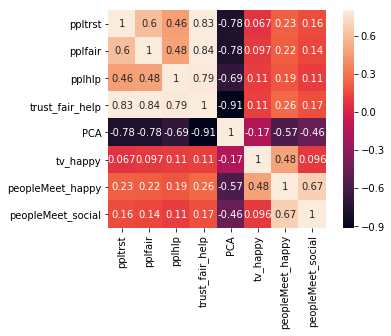

In [130]:
newcorr = plotdf.corr()
sns.heatmap(newcorr, annot=True, vmax=.8, square=True)